# 方法一：提取所有像素

In [3]:
import cv2
import numpy as np
import os
import zipfile
# from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns # 绘制分类变量的计数直方图
import matplotlib.pyplot as plt
tf.__version__

'2.16.1'

## 圖片轉像素資料

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = './Datasets/homer_bart_1.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [9]:
directory = './homer_bart_1'
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]
print(files)
type(files)

['./homer_bart_1/.DS_Store', './homer_bart_1/bart1.bmp', './homer_bart_1/bart10.bmp', './homer_bart_1/bart100.bmp', './homer_bart_1/bart101.bmp', './homer_bart_1/bart102.bmp', './homer_bart_1/bart103.bmp', './homer_bart_1/bart104.bmp', './homer_bart_1/bart105.bmp', './homer_bart_1/bart106.bmp', './homer_bart_1/bart108.bmp', './homer_bart_1/bart109.bmp', './homer_bart_1/bart11.bmp', './homer_bart_1/bart110.bmp', './homer_bart_1/bart111.bmp', './homer_bart_1/bart112.bmp', './homer_bart_1/bart113.bmp', './homer_bart_1/bart114.bmp', './homer_bart_1/bart115.bmp', './homer_bart_1/bart116.bmp', './homer_bart_1/bart117.bmp', './homer_bart_1/bart118.bmp', './homer_bart_1/bart119.bmp', './homer_bart_1/bart12.bmp', './homer_bart_1/bart120.bmp', './homer_bart_1/bart121.bmp', './homer_bart_1/bart122.bmp', './homer_bart_1/bart123.bmp', './homer_bart_1/bart124.bmp', './homer_bart_1/bart125.bmp', './homer_bart_1/bart126.bmp', './homer_bart_1/bart127.bmp', './homer_bart_1/bart128.bmp', './homer_bart_1/

list

In [10]:
height, width = 128, 128  # 設置要調整的圖像尺寸

images = []  # 用於存儲處理後的圖像的數組
classes = []  # 用於存儲每個圖像的類別的數組

for image_path in files:  # 遍歷所有的圖像文件路徑
    try:
        image = cv2.imread(image_path)  # 讀取圖像
        H, W = image.shape[:2]  # 獲取原始圖像的高度和寬度
    except:
        continue  # 如果無法讀取圖像，跳過該圖像

    image = cv2.resize(image, (width, height))  # 調整圖像大小為指定的寬度和高度
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # 將圖像轉換為灰度圖像
    # print(image.shape) # (128, 128)
	
    cv2.imshow("image",image)  # 顯示處理後的圖像
	
    image = image.ravel()  # 將圖像平坦化為一維數組
    # print(image.shape)  # (16384,)
    images.append(image)  # 將平坦化後的圖像添加到 images 數組中

    # 根據文件名判斷類別，如果ㄥ文件名以 'b' 開頭，類別為 0，否則為 1
    image_name = os.path.basename(os.path.normpath(image_path))
    class_name = 0 if image_name.startswith('b') else 1
    classes.append(class_name)  # 將圖像類別添加到 classes 數組中

資料由陣列轉np

In [11]:
print(type(images), type(classes))

X = np.asarray(images)
y = np.asarray(classes)

print(type(X), type(y))
print(X.shape, y.shape) # 16384 = 128 * 128

<class 'list'> <class 'list'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(269, 16384) (269,)


## 查看原資料

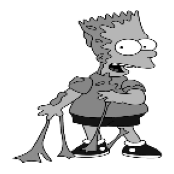

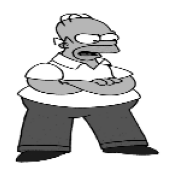

In [12]:
X[0].reshape(width, height).shape

image_np = cv2.cvtColor(X[0].reshape(width, height), cv2.COLOR_BGR2RGB) # 將 OpenCV 中的 BGR 格式轉換為 RGB 格式，因為 Matplotlib 預期的是 RGB 格式
plt.figure(figsize=(4, 2))
plt.axis('off')  # 隱藏坐標軸
plt.imshow(image_np)

image_np = cv2.cvtColor(X[200].reshape(width, height), cv2.COLOR_BGR2RGB) # 將 OpenCV 中的 BGR 格式轉換為 RGB 格式，因為 Matplotlib 預期的是 RGB 格式
plt.figure(figsize=(4, 2))
plt.axis('off')  # 隱藏坐標軸
plt.imshow(image_np)

<Axes: xlabel='y', ylabel='count'>

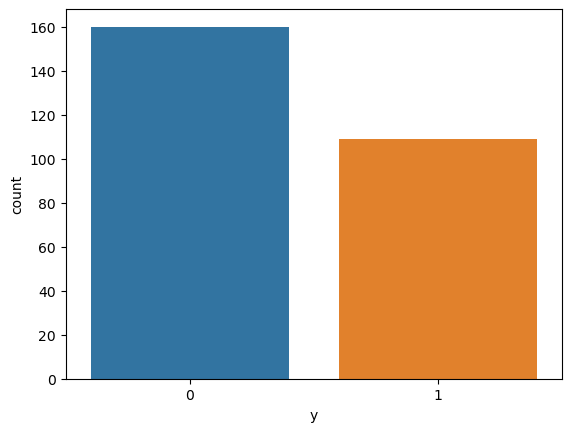

In [13]:
# 将NumPy数组转换为Pandas DataFrame，并将列标记为分类变量
df = pd.DataFrame({'y': y})
df['y'] = df['y'].astype('category')

# 绘制计数直方图
sns.countplot(data=df, x='y')

In [14]:
# 函数返回一个包含两个元素的元组，第一个元素是 y 中唯一值的列表，第二个元素是每个唯一值对应的出现次数。
np.unique(y, return_counts=True)

(array([0, 1]), array([160, 109]))

## 數據標準化

In [53]:
X[0].max(), X[0].min()

(255, 0)

使用了 scikit-learn 庫中的 MinMaxScaler 類，對數據進行了最小-最大規範化（也稱為歸一化）處理。

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [55]:
X[0].max(), X[0].min() # (1.0000000000000002, 0.0)

(1.0000000000000002, 0.0)

## 訓練集與資料集

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((215, 16384), (215,), (54, 16384), (54,))

### Building and training the neural network

In [ ]:
(16384 + 2) / 2

8193.0

## 建立模型

In [59]:
# 16384 -> 8193 -> 8193 -> 1 

# 建立序列模型对象
network1 = tf.keras.models.Sequential()

# 添加第一个全连接层，包含8193个神经元（輸入16384輸出2平均），输入特征数量为16384（X_train大小），使用ReLU激活函数
network1.add(tf.keras.layers.Dense(input_shape=(16384,), units=8193, activation='relu'))
 
# 添加第二个全连接层，包含8193个神经元，使用ReLU激活函数
network1.add(tf.keras.layers.Dense(units=8193, activation='relu'))

# 添加输出层，包含1个神经元，使用Sigmoid激活函数，通常用于二元分类任务
network1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


network1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8193)           │   134,242,305 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8193)           │    67,133,442 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,383,941 (768.22 MB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

配置神经网络模型的编译过程

In [60]:
# https://keras.io/api/optimizers/
# https://keras.io/api/losses/
network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

開始訓練

In [61]:
history = network1.fit(X_train, y_train, epochs=50)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5295 - loss: 158.4096
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4463 - loss: 14.9382
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5737 - loss: 8.2449
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 863ms/step - accuracy: 0.4562 - loss: 3.0339
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 962ms/step - accuracy: 0.4058 - loss: 0.8234
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5980 - loss: 0.6706
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6300 - loss: 0.6429
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 987ms/step - accuracy: 0.6415 - loss: 0.6333
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6200 - loss: 0.6619
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 665ms/step - accuracy: 0.6131 - loss: 0.6575
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 629ms/step - accuracy: 0.6223 - loss: 0.6386
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 804ms/step - accuracy: 0.6195 - loss: 0.6839


### Evaluating the neural network

In [62]:
history.history.keys() # 于获取训练历史记录中的所有键的方法

dict_keys(['accuracy', 'loss'])

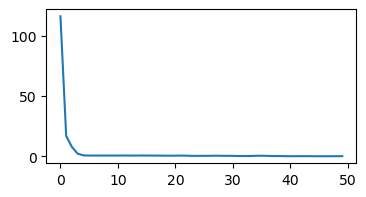

In [70]:
plt.figure(figsize=(4, 2))
plt.plot(history.history['loss'])


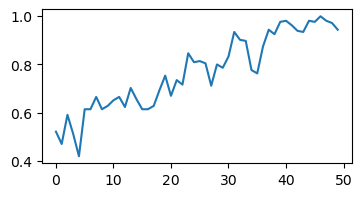

In [71]:
plt.figure(figsize=(4, 2))
plt.plot(history.history['accuracy'])

## 輸出預設值

In [72]:
predictions = network1.predict(X_test)
predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step


array([[2.45422195e-03],
       [9.96010840e-01],
       [1.16476798e-02],
       [2.49132849e-02],
       [6.24215662e-01],
       [1.67035535e-02],
       [9.96945202e-01],
       [8.28105509e-01],
       [1.50544420e-01],
       [6.84849441e-01],
       [2.12606825e-02],
       [9.99537528e-01],
       [6.32948518e-01],
       [3.03234756e-01],
       [4.99957204e-02],
       [5.70410863e-03],
       [8.57641697e-02],
       [6.03701711e-01],
       [1.49469804e-02],
       [3.45428847e-03],
       [2.26983358e-03],
       [6.27468228e-01],
       [4.44443664e-03],
       [3.10250241e-02],
       [3.30312215e-02],
       [4.25962418e-01],
       [4.90964390e-03],
       [7.69235659e-03],
       [8.96721482e-02],
       [8.58192027e-01],
       [1.39135033e-01],
       [9.88414407e-01],
       [5.50114453e-01],
       [1.76770368e-03],
       [9.98775125e-01],
       [3.40068084e-03],
       [2.23894134e-01],
       [7.16069946e-03],
       [1.07661925e-01],
       [1.95289450e-03],


0 False - Bart

1 True  - Homer

In [73]:
predictions = (predictions > 0.5)
predictions

array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False]])

計算精確率並繪製混淆矩陣

0.7037037037037037


<Axes: >

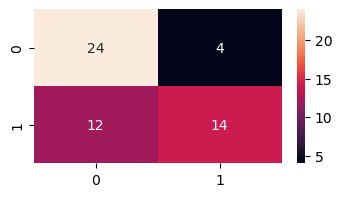

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
cm
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True)


產生分類報告

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75        28
           1       0.78      0.54      0.64        26

    accuracy                           0.70        54
   macro avg       0.72      0.70      0.69        54
weighted avg       0.72      0.70      0.70        54



## 儲存/載入模型

In [4]:
# 保存模型結構
model_json = network1.to_json()
with open('network1.json', 'w') as json_file:
  json_file.write(model_json)


# 保存模型參數
from keras.models import save_model
network1_saved = save_model(network1, 'weights1.hdf5')
  

NameError: name 'network1' is not defined

In [5]:
# 載入模型結構
with open('network1.json') as json_file:
  json_saved_model = json_file.read()
json_saved_model

# 載入模型參數
network1_loaded = tf.keras.models.model_from_json(json_saved_model)
network1_loaded.load_weights('./weights1.hdf5')
network1_loaded.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [6]:
network1_loaded.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8193)           │   134,242,305 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8193)           │    67,133,442 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,383,941 (768.22 MB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

## 針對圖片進行辨識

In [7]:
print(X_test[0].shape)

NameError: name 'X_test' is not defined

In [33]:
test_image = X_test[0]
print(test_image)
print(test_image.shape)
test_image = scaler.inverse_transform(test_image.reshape(1, -1))
print(test_image)

[255 255 255 ... 255 255 255]
(16384,)
[[48769. 49023. 49023. ... 57913. 62993. 51563.]]


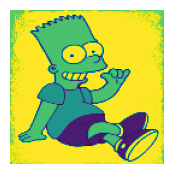

In [34]:
# image_np = cv2.cvtColor(test_image.reshape(width, height), cv2.COLOR_BGR2RGB) # 將 OpenCV 中的 BGR 格式轉換為 RGB 格式，因為 Matplotlib 預期的是 RGB 格式
plt.figure(figsize=(4, 2))
plt.axis('off')  # 隱藏坐標軸
plt.imshow(test_image.reshape(width, height))

In [38]:
print(network1_loaded.predict(test_image)[0])
print(network1_loaded.predict(test_image)[0].shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step
[0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
(1,)


In [40]:
if network1_loaded.predict(test_image)[0] < 0.5:
  print('Bart')
else:
  print('Homer')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Bart
